In [1]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup

### WebScrapping from IMDB for the top 100 Movies using BeautifulSoup and URLlib

In [2]:
#response = urlopen("http://www.imdb.com/list/ls055592025/")
req = Request(
    url='https://www.imdb.com/list/ls055592025/', 
    headers={'User-Agent': 'Mozilla/5.0'}
)
response = urlopen(req)
soup = BeautifulSoup(response.read(), "html.parser")

In [3]:
for div in soup.findAll('div', {'class': 'lister-item-content'}):
    for b in div.findAll('h3'):
        for a in b.findAll('a'):
            print(a.text)

The Godfather
The Shawshank Redemption
Schindler's List
Raging Bull
Casablanca
Citizen Kane
Gone with the Wind
The Wizard of Oz
One Flew Over the Cuckoo's Nest
Lawrence of Arabia
Vertigo
Psycho
The Godfather Part II
On the Waterfront
Sunset Blvd.
Forrest Gump
The Sound of Music
12 Angry Men
West Side Story
Star Wars
2001: A Space Odyssey
E.T. the Extra-Terrestrial
The Silence of the Lambs
Chinatown
The Bridge on the River Kwai
Singin' in the Rain
It's a Wonderful Life
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Some Like It Hot
Ben-Hur
Apocalypse Now
Amadeus
The Lord of the Rings: The Return of the King
Gladiator
Titanic
From Here to Eternity
Saving Private Ryan
Unforgiven
Raiders of the Lost Ark
Rocky
A Streetcar Named Desire
The Philadelphia Story
To Kill a Mockingbird
An American in Paris
The Best Years of Our Lives
My Fair Lady
A Clockwork Orange
Doctor Zhivago
The Searchers
Jaws
Patton
Butch Cassidy and the Sundance Kid
The Treasure of the Sierra Madre
Il 

In [4]:
links=[]
titles=[]

for div in soup.findAll('div', {'class': 'lister-item-content'}):
    for b in div.findAll('h3'):
        for a in b.findAll('a'):
            titles.append(a.text)
            links.append('http://www.imdb.com'+a['href'])

print(str(len(links)))

100


In [5]:
titles[:5]

['The Godfather',
 'The Shawshank Redemption',
 "Schindler's List",
 'Raging Bull',
 'Casablanca']

In [6]:
links[0]

'http://www.imdb.com/title/tt0068646/?ref_=ttls_li_tt'

### Saving the Movie titles and their respective links as a JSON dump

In [7]:
import json

with open('titles.txt', 'w') as filehandle:
    json.dump(titles, filehandle)
with open('links.txt', 'w') as filehandle:
    json.dump(links,filehandle)

In [ ]:
https://www.imdb.com/title/tt0068646/plotsummary/  https://www.imdb.com/title/tt0068646/?ref_=ttls_li_tt  https://www.imdb.com/title/tt0068646/plotsummary/?ref_=tt_stry_pl#synopsis

In [8]:
":https://www.imdb.com/title/tt0068646/?ref_=ttls_li_tt".partition("?")[0]

':https://www.imdb.com/title/tt0068646/'

### WebScrapping from IMDB for each of the links to scrap the synopsis

In [36]:
synopsis=[]

for i in links:
    
    response = urlopen(Request(str(i).partition('?')[0]+"plotsummary/?ref_=tt_stry_pl#synopsis",headers={'User-Agent': 'Mozilla/5.0'}))
    soup = BeautifulSoup(response.read(), "html.parser")
    for head in soup.findAll('h2',{'class':'sc-a885edd8-9 dcErWY'}):
        synopsis.append(head.text + " Synopsis")
    for div in soup.findAll('div',{'data-testid':"sub-section-synopsis"}):
        for syn in div.findAll('div',{'class':'ipc-html-content-inner-div'}):
            #print(syn.text)
            synopsis.append(syn.text)
    synopsis.append(" ")

In [45]:
synopsis

['The Godfather Synopsis',
 'In late summer 1945, guests are gathered for the wedding of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors. One of the men is Amerigo Bonasera, an old friend of the Don, whose daughter was beaten by two young men who received minimal punishment. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punish the young men responsible.Meanwhile, the Don\'s youngest son Michael (Al Pacino), a decorated Marine hero returning from World War II service, arrives at the wedding and tells his girlfriend Kay Adams (Diane Keaton) about his father\'s criminal life; he reassures her that he doesn\'t plan to join them. Michael figuratively introduces th

### Saving the synopsis as a JSON dump

In [37]:
with open('synopsis.txt', 'w') as filehandle:
    json.dump(synopsis, filehandle)

In [4]:
import numpy as np 
import pandas as pd

### Top 10 Movies based on IMDB 

In [32]:
pd.DataFrame(titles,columns=["Title"]).head(10)

,Title
0,The Godfather
1,The Shawshank Redemption
2,Schindler's List
3,Raging Bull
4,Casablanca
5,Citizen Kane
6,Gone with the Wind
7,The Wizard of Oz
8,One Flew Over the Cuckoo's Nest
9,Lawrence of Arabia


##### Storing all the synopsis from the movies and removing any duplicates

In [83]:
synopsis = synopsis[::2]

In [88]:
with open('synopsis.txt', 'w') as filehandle:
    json.dump(synopsis,filehandle)

# Natural Laguage processing with NLTK

In [8]:
import nltk

#### Tokenizing the Synopsis for the God Father Movie for further processing

In [97]:
mytext = nltk.word_tokenize(synopsis[1])

#### Most common words in the Synopsis for movie The GodFather

In [101]:
nltk.FreqDist(mytext).most_common(10) 

[(',', 124),
 ('the', 102),
 ('.', 96),
 ('to', 73),
 ('and', 66),
 ('is', 50),
 ('a', 46),
 ("'s", 43),
 ('Michael', 40),
 ('his', 39)]

In [104]:
synopsis[1].lower()

'in late summer 1945, guests are gathered for the wedding of don vito corleone\'s daughter connie (talia shire) and carlo rizzi (gianni russo). vito (marlon brando), the head of the corleone mafia family, is known as "godfather." he and tom hagen (robert duvall), the corleone family lawyer, are hearing requests for favors. one of the men is amerigo bonasera, an old friend of the don, whose daughter was beaten by two young men who received minimal punishment. the don\'s wife is godmother to bonasera\'s shamed daughter, a relationship the don uses to extract new loyalty from the undertaker. the don agrees to have his men punish the young men responsible.meanwhile, the don\'s youngest son michael (al pacino), a decorated marine hero returning from world war ii service, arrives at the wedding and tells his girlfriend kay adams (diane keaton) about his father\'s criminal life; he reassures her that he doesn\'t plan to join them. michael figuratively introduces the main characters to kay. fr

#### creating a List of stopwords and punctuations and characters taht don't add any comprehensive value

In [9]:
import string
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)+["'s",'``',"''","--"]

In [10]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### loading the synopsis.txt and using it for further processing

In [1]:
import json
with open('synopsis.txt', 'r') as filehandle:
    syn=json.load(filehandle)

In [2]:
syn

['The Godfather Synopsis',
 'In late summer 1945, guests are gathered for the wedding of Don Vito Corleone\'s daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors. One of the men is Amerigo Bonasera, an old friend of the Don, whose daughter was beaten by two young men who received minimal punishment. The Don\'s wife is godmother to Bonasera\'s shamed daughter, a relationship the Don uses to extract new loyalty from the undertaker. The Don agrees to have his men punish the young men responsible.Meanwhile, the Don\'s youngest son Michael (Al Pacino), a decorated Marine hero returning from World War II service, arrives at the wedding and tells his girlfriend Kay Adams (Diane Keaton) about his father\'s criminal life; he reassures her that he doesn\'t plan to join them. Michael figuratively introduces th

In [5]:
df = pd.DataFrame(syn, columns=['text'])

In [6]:
df

,text
0,The Godfather Synopsis
1,"In late summer 1945, guests are gathered for t..."
2,The Shawshank Redemption Synopsis
3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,Schindler's List Synopsis
...,...
192,Rebel Without a Cause Synopsis
193,Shortly after moving to Los Angeles with his p...
194,North by Northwest Synopsis
195,"Roger O. Thornhill, a twice-divorced Madison A..."


#### After Cleaning the Most common words

In [120]:
clean_all_words = []
def clean(x):
    for word in x:
        if word not in stopwords:
            clean_all_words.append(word)
            
clean(mytext)
clean_all_words

['In',
 'late',
 'summer',
 '1945',
 'guests',
 'gathered',
 'wedding',
 'Don',
 'Vito',
 'Corleone',
 'daughter',
 'Connie',
 'Talia',
 'Shire',
 'Carlo',
 'Rizzi',
 'Gianni',
 'Russo',
 'Vito',
 'Marlon',
 'Brando',
 'head',
 'Corleone',
 'Mafia',
 'family',
 'known',
 'Godfather',
 'He',
 'Tom',
 'Hagen',
 'Robert',
 'Duvall',
 'Corleone',
 'family',
 'lawyer',
 'hearing',
 'requests',
 'favors',
 'One',
 'men',
 'Amerigo',
 'Bonasera',
 'old',
 'friend',
 'Don',
 'whose',
 'daughter',
 'beaten',
 'two',
 'young',
 'men',
 'received',
 'minimal',
 'punishment',
 'The',
 'Don',
 'wife',
 'godmother',
 'Bonasera',
 'shamed',
 'daughter',
 'relationship',
 'Don',
 'uses',
 'extract',
 'new',
 'loyalty',
 'undertaker',
 'The',
 'Don',
 'agrees',
 'men',
 'punish',
 'young',
 'men',
 'responsible.Meanwhile',
 'Don',
 'youngest',
 'son',
 'Michael',
 'Al',
 'Pacino',
 'decorated',
 'Marine',
 'hero',
 'returning',
 'World',
 'War',
 'II',
 'service',
 'arrives',
 'wedding',
 'tells',
 'gi

In [122]:
nltk.FreqDist(clean_all_words).most_common(120) 

[('Michael', 40),
 ('Don', 31),
 ('Corleone', 21),
 ('Sonny', 21),
 ('Carlo', 18),
 ('family', 15),
 ('Connie', 13),
 ('Sollozzo', 13),
 ('Vito', 10),
 ('Hagen', 10),
 ('Clemenza', 10),
 ('Tattaglia', 9),
 ('Kay', 8),
 ('father', 8),
 ('meeting', 8),
 ('killed', 8),
 ('Barzini', 8),
 ('Paulie', 7),
 ('He', 6),
 ('Tom', 6),
 ('men', 6),
 ('Fredo', 6),
 ('later', 6),
 ('Rocco', 6),
 ('business', 6),
 ('The', 5),
 ('son', 5),
 ('Al', 5),
 ('one', 5),
 ('Woltz', 5),
 ('Family', 5),
 ('shot', 5),
 ('Corleones', 5),
 ('Tessio', 5),
 ('Greene', 5),
 ('daughter', 4),
 ('new', 4),
 ('refuses', 4),
 ('meets', 4),
 ('Brasi', 4),
 ('assassination', 4),
 ('bodyguard', 4),
 ('Lampone', 4),
 ('car', 4),
 ('away', 4),
 ('home', 4),
 ('Moe', 4),
 ('In', 3),
 ('head', 3),
 ('old', 3),
 ('two', 3),
 ('young', 3),
 ('tells', 3),
 ('Consigliere', 3),
 ('Fontane', 3),
 ('help', 3),
 ('role', 3),
 ('explains', 3),
 ('political', 3),
 ('protection', 3),
 ('move', 3),
 ('questions', 3),
 ('Luca', 3),
 ('house'

In [123]:
len(clean_all_words)

1254

In [125]:
df = pd.DataFrame(clean_all_words, columns=['text'])

#### Further Processing

In [47]:
df

,text
0,The Godfather Synopsis
1,"In late summer 1945, guests are gathered for t..."
2,The Shawshank Redemption Synopsis
3,"In 1947, Andy Dufresne (Tim Robbins), a banker..."
4,Schindler's List Synopsis
...,...
192,Rebel Without a Cause Synopsis
193,Shortly after moving to Los Angeles with his p...
194,North by Northwest Synopsis
195,"Roger O. Thornhill, a twice-divorced Madison A..."


#### Converting to lower case

In [11]:
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'].head()

0                               the godfather synopsis
1    in late summer 1945, guests are gathered for t...
2                    the shawshank redemption synopsis
3    in 1947, andy dufresne (tim robbins), a banker...
4                            schindler's list synopsis
Name: text, dtype: object

#### Remove the stopwords

In [12]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))
df['text'].head()

0                                   godfather synopsis
1    late summer 1945, guests gathered wedding vito...
2                        shawshank redemption synopsis
3    1947, andy dufresne (tim robbins), banker main...
4                            schindler's list synopsis
Name: text, dtype: object

#### Word stemming

In [13]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                        godfath synopsi
1      late summer 1945, guest gather wed vito corleo...
2                              shawshank redempt synopsi
3      1947, andi dufresn (tim robbins), banker maine...
4                                schindler' list synopsi
                             ...                        
192                           rebel without caus synopsi
193    shortli move lo angel parents, 17-year-old jim...
194                              north northwest synopsi
195    roger o. thornhill, twice-divorc madison avenu...
196                            yanke doodl dandi synopsi
Name: text, Length: 197, dtype: object

### Word Cloud for The GodFather

In [54]:
wc_a = df['text'].iloc[1]

Word Cloud for God Father


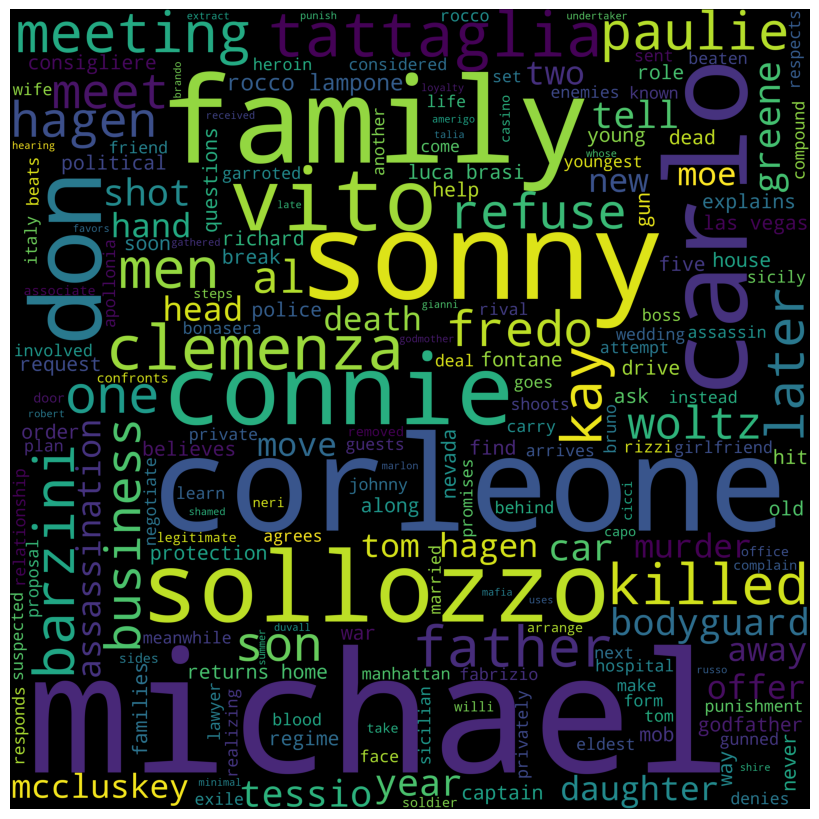

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for God Father")
plt.show()

### Word Cloud for The Shawshank redemption

Word Cloud for The Shawshank redemption


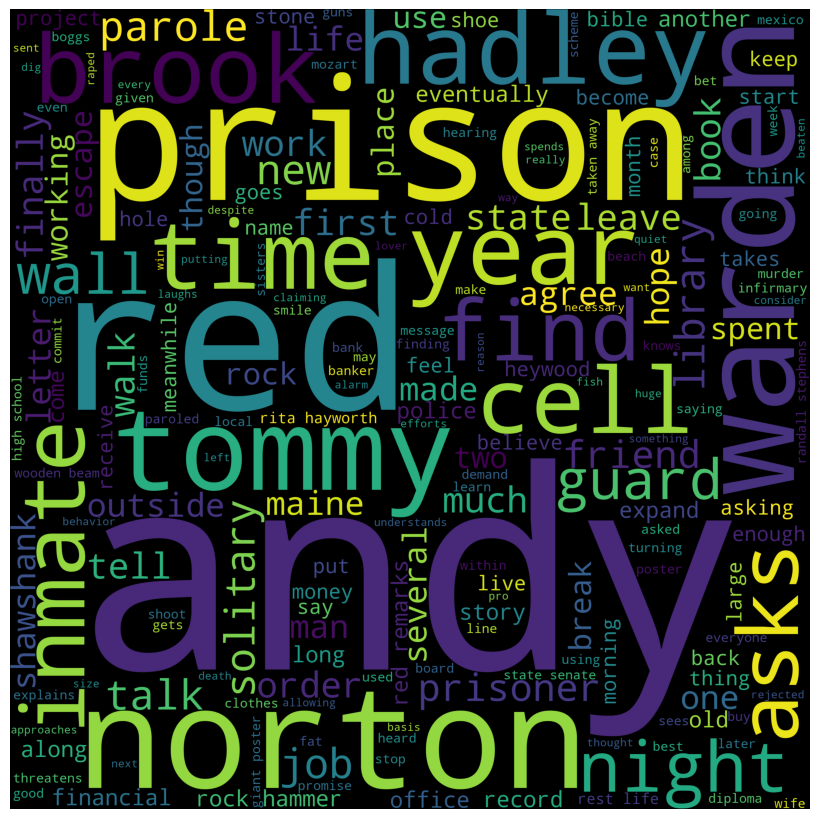

In [59]:
wc_b = df['text'].iloc[3]

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_b) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for The Shawshank redemption")
plt.show()

### Sentiment Analysis for Psycho movie synopsis

In [71]:
print(df['text'].iloc[22])
df['text'].iloc[23]

psycho synopsis


'phoenix hotel room friday afternoon, marion crane (janet leigh) out-of-town lover sam loomis (john gavin) end stolen lunchtime interlude yet another disagreement future. marion wants marry sam, debts inherited father alimony payments leave enough money support would like. done often sam\'s business trips phoenix, part leaving future uncertain.marion returns real estate office works secretary, arriving ahead boss mr. lowery (vaughn taylor) client cassidy (frank albertson) buys house lowery $40,000 cash. lowery tells marion put money safe deposit box bank monday. pleading headache, marion asks take rest day errand bank.but marion go bank. spur moment, decides keep money, packs suitcase, starts driving town, spotted boss intersection gives suspicious look. worried found already, still proceeds town way fairvale, california, sam lives. keeps looking behind her, fearful followed. drives well night parks alongside road sleep.in morning, highway patrolman (mort mills) stops investigate stopp

In [72]:
from nltk.sentiment import SentimentIntensityAnalyzer
#nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

text = df['text'].iloc[23]
scores = analyzer.polarity_scores(text)
print(scores)

{'neg': 0.138, 'neu': 0.796, 'pos': 0.066, 'compound': -0.9987}


Most of the words are neutral or negative in nature for the plot synopsis which is understandaable being a horror - thriller movie , the negative sentiment weight is going to be higher than the positive sentiment

### lets check the word count and sentence count for the 7th most popular movie 
## Gone with the Wind

In [14]:
print(df['text'].iloc[12])
df['text'].iloc[13]

gone wind synopsis


'film opens tara, cotton plantation owned proud gerald o\'hara (thomas mitchell), self-made man irish descent, confederate state georgia near atlanta. date april 1861. wife, ellen (barbara o\'neil), three beautiful daughters; suellen (evelyn keyes), carreen (ann rutherford), headstrong 16-year-old scarlett (vivien leigh). scarlett spends days fun, tormenting household servants, flirting men, especially twins brent stuart tarleton (fred crane, george reeves). brothers anticipate next ball hope scarlett attend ball one them. tarletons speculate impending war north south due recent attack fort sumter. scarlett finds latter topic boring certain war. runs meet father riding home fields. returns home news.neighbor john wilkes (howard hickman) hosts barbecue party twelve oaks plantation. scarlett pines wilkes\' son, ashley (leslie howard), lanky, soft-spoken young man refined bearing, though reciprocate feelings. father sternly tells pursue ashley longer daughter one day wed southern gentlema

In [15]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


In [16]:
text = df['text'].iloc[13]

In [17]:
words = word_tokenize(text)
sentences = sent_tokenize(text)

print('10 most common words')
nltk.FreqDist(words).most_common(10)


10 most common words


[(',', 275),
 ('.', 190),
 ('scarlett', 122),
 ('rhett', 75),
 ("'s", 53),
 ('ashley', 47),
 ('melanie', 44),
 ('(', 37),
 (')', 37),
 ('tara', 25)]

In [20]:
print(sentences)

["film opens tara, cotton plantation owned proud gerald o'hara (thomas mitchell), self-made man irish descent, confederate state georgia near atlanta.", "date april 1861. wife, ellen (barbara o'neil), three beautiful daughters; suellen (evelyn keyes), carreen (ann rutherford), headstrong 16-year-old scarlett (vivien leigh).", 'scarlett spends days fun, tormenting household servants, flirting men, especially twins brent stuart tarleton (fred crane, george reeves).', 'brothers anticipate next ball hope scarlett attend ball one them.', 'tarletons speculate impending war north south due recent attack fort sumter.', 'scarlett finds latter topic boring certain war.', 'runs meet father riding home fields.', 'returns home news.neighbor john wilkes (howard hickman) hosts barbecue party twelve oaks plantation.', "scarlett pines wilkes' son, ashley (leslie howard), lanky, soft-spoken young man refined bearing, though reciprocate feelings.", 'father sternly tells pursue ashley longer daughter one 

In [21]:
text = df['text'].iloc[13]
mytext = nltk.word_tokenize(text)
clean_all_words = []
def clean(x):
    for word in x:
        if word not in stopwords:
            clean_all_words.append(word)
            
clean(mytext)
clean_all_words

['film',
 'opens',
 'tara',
 'cotton',
 'plantation',
 'owned',
 'proud',
 'gerald',
 "o'hara",
 'thomas',
 'mitchell',
 'self-made',
 'man',
 'irish',
 'descent',
 'confederate',
 'state',
 'georgia',
 'near',
 'atlanta',
 'date',
 'april',
 '1861.',
 'wife',
 'ellen',
 'barbara',
 "o'neil",
 'three',
 'beautiful',
 'daughters',
 'suellen',
 'evelyn',
 'keyes',
 'carreen',
 'ann',
 'rutherford',
 'headstrong',
 '16-year-old',
 'scarlett',
 'vivien',
 'leigh',
 'scarlett',
 'spends',
 'days',
 'fun',
 'tormenting',
 'household',
 'servants',
 'flirting',
 'men',
 'especially',
 'twins',
 'brent',
 'stuart',
 'tarleton',
 'fred',
 'crane',
 'george',
 'reeves',
 'brothers',
 'anticipate',
 'next',
 'ball',
 'hope',
 'scarlett',
 'attend',
 'ball',
 'one',
 'tarletons',
 'speculate',
 'impending',
 'war',
 'north',
 'south',
 'due',
 'recent',
 'attack',
 'fort',
 'sumter',
 'scarlett',
 'finds',
 'latter',
 'topic',
 'boring',
 'certain',
 'war',
 'runs',
 'meet',
 'father',
 'riding',


In [22]:
print('10 most common words after Cleaning')
nltk.FreqDist(clean_all_words).most_common(10)

10 most common words after Cleaning


[('scarlett', 122),
 ('rhett', 75),
 ('ashley', 47),
 ('melanie', 44),
 ('tara', 25),
 ('war', 16),
 ('atlanta', 15),
 ('tells', 15),
 ('mammy', 14),
 ('bonnie', 14)]